# CURSO DE POSGRADO
# INTELIGENCIA ARTIFICIAL APLICADA A CIENCIAS DE LA SALUD

#### **Universidad Nacional del Litoral** 
![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9907890941.png)

# **Módulo 3**
# **Machine Learning**
![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/4593688547.png)

#### **Bibliografia recomendada**
1) `Estadistica practica para ciencia de datos`
- Peter Bruce, Andrew Bruce, Peter Gedeck - Practical Statistics for Data Scientists_ 50+ Essential Concepts Using R and Python-O'Reilly Media (2020)
- Repositorio: [Link](https://github.com/gedeck/practical-statistics-for-data-scientists)
2) `www.cienciadedatos.net`

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/2942544287.png)


# **Aprendizaje supervisado**

Comenzaremos a desarrollar nuestros dos primeros modelos de ML. 

Abordaremos un problema de *clasificación* y otro de *regresión*.

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9334726313.png"
style = "width:600px;">

En las clases asincrónicas de *regresión* y *clasificación* veremos en mayor profundidad distintos algoritmos que se pueden utilizar para ambos tipos de problemas.

Repasaremos como abordar un problema de ***regresión lineal*** (01_ML_Supervised_Regression) y un problema de ***regresión logística*** en el (02_ML_Supervised_Unsupervised). 

## `¿Como trabajaremos?`

Utilizaremos mayoritariamente la librería llamada Scikit-Learn. Pueden revisar la documentación [aquí](https://scikit-learn.org/stable/) (está en inglés). Como regla general pueden ayudarse de [ChatGPT](https://chat.openai.com/chat/) para resolver problemas más básicos y usar la documentación para casos puntuales. 

Estaremos trabajando con clases, objetos, métodos y atributos de esta libreria. 

### Repasando conceptos

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/imagen1.png"
style = "width:600px;">

En aprendizaje supervisado siempre necesitamos tener datos etiquetados. Cualquier tipo de dato (imagen, sonido, texto, tablas) pueden tener su correspondiente etiqueta (vivo/muerto, exito/fracaso, ganancia de esa transacción, sueldo estimado, etc.) Para estas clases utilizaremos datos tabulares etiquetados. Repasemoslos visualmente:

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/imagen2.png"
style = "width:600px;">


En una primera etapa, instanciamos una clase -nuestro modelo de ML-. Luego, entrenamos y predecimos -ambos son métodos de la clase que instanciamos-.

# **Regresión**

## CONTENIDO A VER:
1) Regresión lineal
2) Arboles de decisión
3) Algoritmos de ensamble

Para cada item veremos:
- a) Conceptos teóricos fundamentales = AKA la verdad de la milanesa
- b) Como entrenar un modelo = AKA correr codigo y que funcione
- c) Como evaluar el modelo entrenado = AKA interpretar métricas

### Primer Paso: `Instalar librerias y dependencias`

In [ ]:
# !pip install --quiet\
# numpy==1.23.5\
# pandas==1.5.3\
# scikit-learn==1.2.2\
# matplotlib==3.7.1\
# seaborn==0.12.2\
# xgboost==2.0.0\
# plotly==5.15.0\
# nbformat==5.9.2\
# graphviz==0.20.1\
# scipy==1.11.3

# **1)Regresión lineal**
**a)Conceptos teóricos**

Como vimos previamente, los problemas de regresión son aquellos que tienen como etiqueta de salida una variable numérica - un dato continuo.

`Los métodos supervisados de machine learning que predicen estas etiquetas con datos numéricos continuos se llaman regresión.`

Comenzaremos trabajando con una regresión lineal de un solo atributo, partiendo de la conocida ecuación de una recta:

#### $ Y = mX + b $

`m` : pendiente

`b` : ordenada al origen

Para "modelar" en el mundo real, un mundo predominado por los fenómenos aleatorios y bastante poco determinístico, vamos a incluir lo que se llama un término de error $\epsilon$. 

Este término le agregará lo que comunmente se conoce como "ruido", el cuál representa información que está presente pero que no es determinante a la hora de encontrar relaciones causales. 

Reescribimos entonces:

### $ Y = mX + b + \epsilon$

$\epsilon$ es un término de error aleatorio que se distribuye normal con media cero y varianza uno, $\epsilon\sim N(0;1)$

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/imagen3.png"
style = "width:300px;">


### Explicación gráfica "sencilla":
<img src="https://i.stack.imgur.com/hfJNV.jpg"
style = "width:300px;">

`El error epsilon es la distancia entre cada punto y la linea roja`. Ese error sigue una distrubición normal y se puede medir en desvíos estándar. Es útil como medida para saber que tan alejado esta el punto real de la linea predicha. 

### Regresión lineal simple - entrenamiento

Bibliografía avanzada recomendada: [Link](https://cienciadedatos.net/documentos/py10-regresion-lineal-python)

En esta sección entrenaremos un dataset sintético con la libreria scikit-learn. 

In [40]:
# Importamos las librerías necesarias
#!pip install numpy pandas matplotlib sklearn seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos el dataset, en este caso es un CSV con datos de pacientes con diabetes con datos continuos y categóricos

Dataset donado por National Institute of Diabetes and Digestive and Kidney Diseases. Más información [aquí](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

`Pregnancies`: Number of times pregnant

`Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

`BloodPressure`: Diastolic blood pressure (mm Hg)

`SkinThickness`: Triceps skin fold thickness (mm)

`Insulin`: 2-Hour serum insulin (mu U/ml)

`BMI`: Body mass index (weight in kg/(height in m)^2)

`DiabetesPedigreeFunction`: Diabetes pedigree function

`Age`: Age (years)

`Outcome`: Class variable (0 or 1)

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/maicobernal/clases_unl/main/databases/diabetes.csv', decimal='.', sep=',')
df.info()
df.drop(df.index[df['Glucose'] == 0], inplace=True)
df.drop(df.index[df['BMI'] == 0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Grafico inicial para explorar relaciones

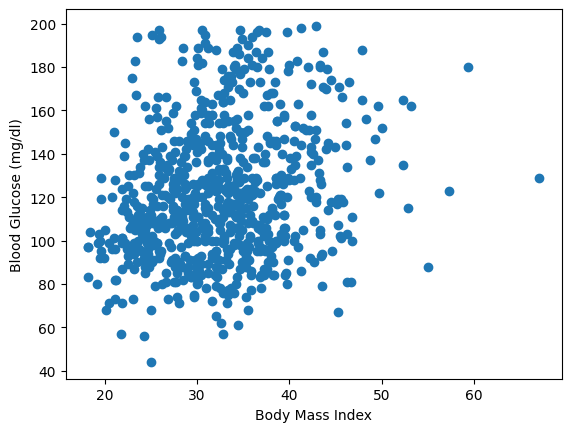

In [44]:
import matplotlib.pyplot as plt

plt.scatter(df['BMI'], df["Glucose"])

plt.ylabel("Blood Glucose (mg/dl)")

plt.xlabel("Body Mass Index")

plt.show()

Hacerlo para todas las columnas, puede ser engorroso. Veamos un método más automatizado para tener una exploración inicial visual de nuestros datos

Información acerca de la libreria Seaborn: [Link](https://seaborn.pydata.org/)

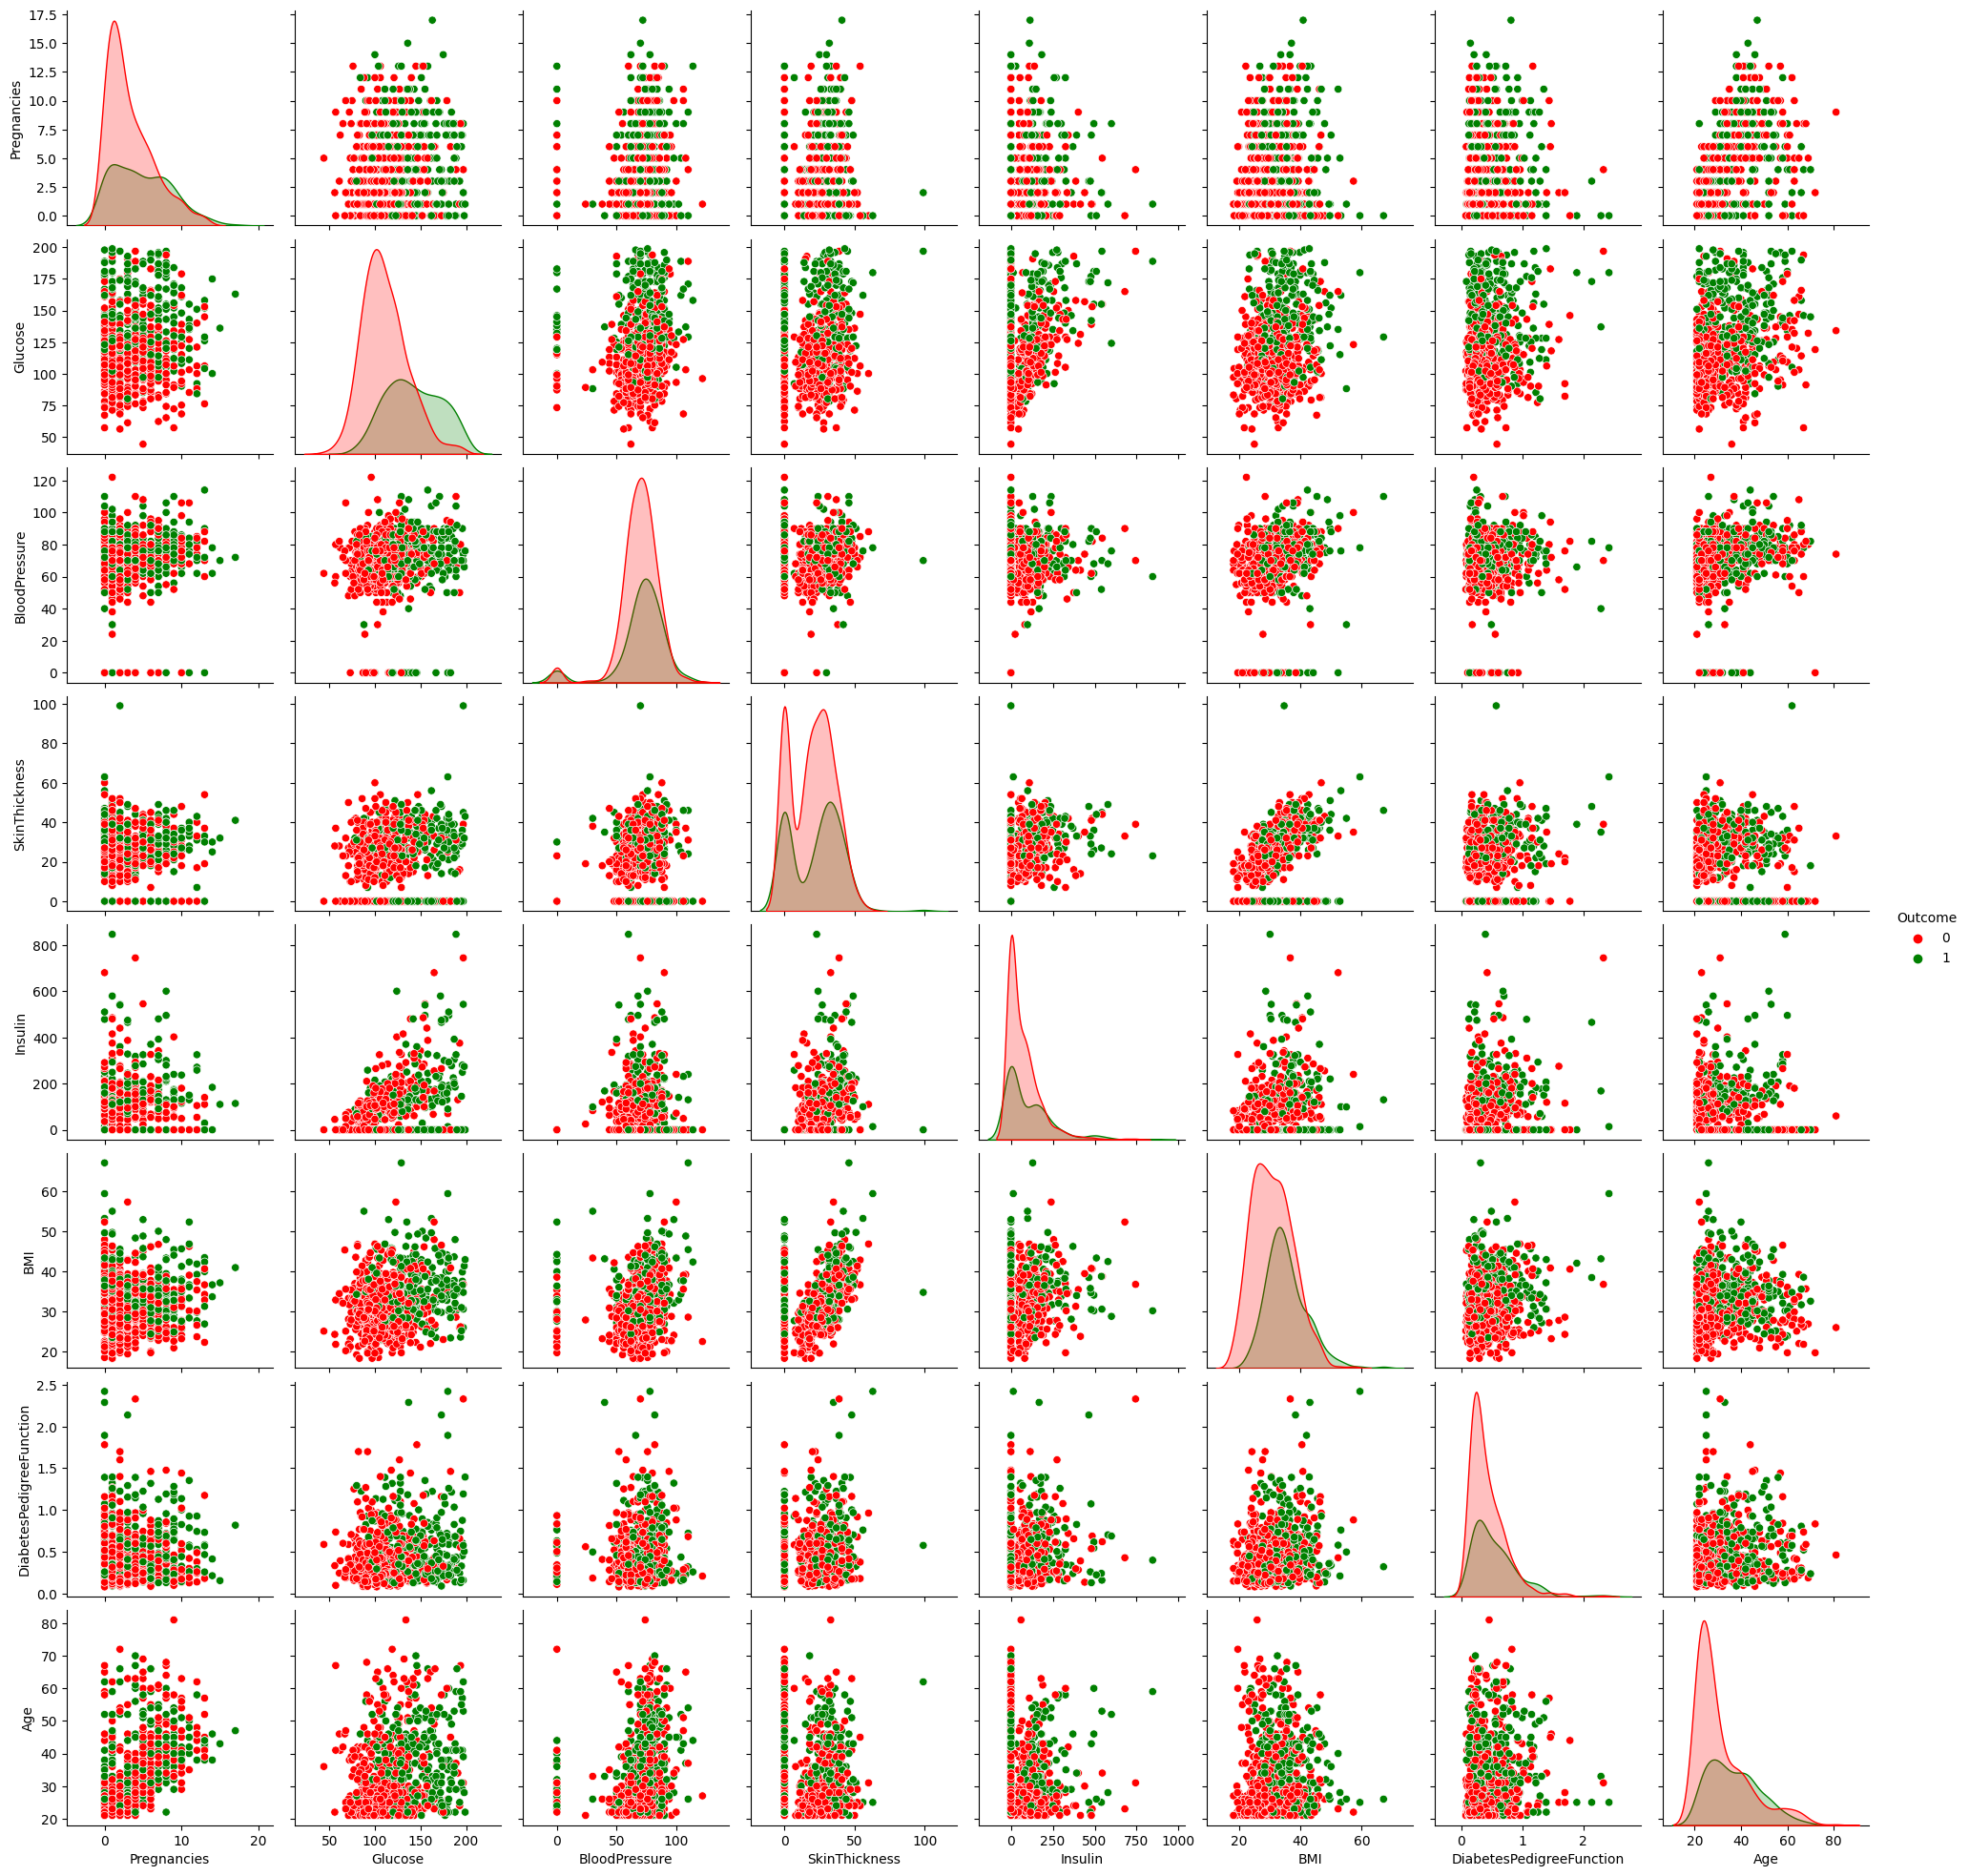

In [45]:
import seaborn as sns
sns.pairplot(df, hue="Outcome", palette = ['r', 'g'])
plt.show()

Como vamos a hablar de regresión, tenemos que tomar una decisión de que variables usar. 
Habitualmente, esto implica un trabajo previo con el equipo. 

Algunas preguntas típicas que hay que hacerse son, desde el punto de vista de un científico de datos que quiere llevar a cabo un proyecto.

- ¿Quién es el consumidor de mis datos? 
- ¿Qué es lo que quiere predecir?
- ¿La predicción, que valor le da al modelo de negocio? 
- ¿Por qué tengo que usar machine learning para esto? ¿No hay nada más sencillo?
- ¿Cuál es la calidad de los datos? ¿Qué tan confiables son desde su origen? ¿Es relevante? 
- ¿Hay madurez en el equipo respecto a la toma de decisiones basadas en datos? 

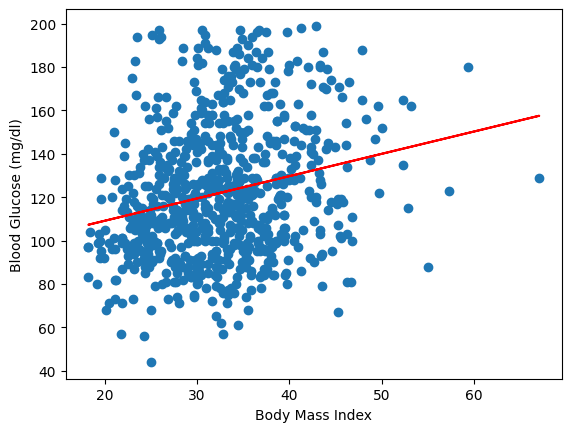

In [46]:
from sklearn.linear_model import LinearRegression

# Iniciamos una clase para entrenar un modelo
regresion_lineal = LinearRegression()

# Lamentablemente Sklearn no soporta datos de Pandas
# Para poder trabajar con ellos, hay que pasarlo a matrices en formato Numpy (otra libreria de Python)
# Hacerlo es sencillo
X = df['BMI'].values.reshape(-1,1)
y = df["Glucose"].values.reshape(-1,1)

# FIT = ENTRENAR EL MODELO
regresion_lineal.fit(X, y)

# PREDICT = HACER PREDICCIONES
# En este caso, vamos a usar todo el dataset, no dividimos en train-test
predictions = regresion_lineal.predict(X)

#  Hacemos los graficos de los datos originales
plt.scatter(df['BMI'], df["Glucose"])

# Hacemos los graficos de las predicciones
plt.plot(df['BMI'], predictions, c='r')

plt.ylabel("Blood Glucose (mg/dl)")

plt.xlabel("Body Mass Index")

plt.show()

Ahora haremos una regresión dividiendo nuestro dataset en `train` y `test` con el método `train_test_split` de la libreria Sklearn. 

En el primer subset, se le muestra al modelo los datos de entrada de cada uno de los registros y sus respectivas variables de salida. De esta manera, irá aprendiendo de los datos asociando los valores de ***x*** con su variable de salida ***y*** para cada registro. 

Mientras que, en el subset de testeo, solamente utilizaremos las variables de entrada para que el modelo vaya realizando sus predicciones. A estas predicciones las compararemos con los valores reales -las etiquetas de salida del subset de testeo- para evaluar cuán bien, o no, está infiriendo nuestro modelo.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Importante setear semilla/seed para resultados reproducibles

# Iniciamos nuestro modelo
reg_all = LinearRegression()

# Entrenamos el modelo
reg_all.fit(X_train, y_train)

# Hacemos las predicciones
predictions = reg_all.predict(X_test)

### ¿Y ahora qué? 
<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9673660266.png"
style = "width:550px;">

In [50]:
X_test[0]

array([36.8])

In [52]:
y_test[0]

array([173])

In [51]:
predictions[0]

array([126.56215074])

## Metricas - como medir lo que estamos entrenando

#### ¿Por qué es importante poder medir nuestros modelos? 


1. `Evaluación del Desempeño`: necesitamos métricas para entender si nuestro modelo hace buenas o malas predicciones.

2. `Comparación de Modelos`: A menudo desarrollamos múltiples modelos para resolver un problema. Las métricas nos ayudan a comparar estos modelos de manera objetiva y elegir el mejor.

3. `Diagnóstico de Problemas`: Si un modelo tiene un desempeño bajo, las métricas nos pueden dar pistas sobre qué es lo que está yendo mal, lo que nos permite mejorar el modelo.

4. `Comunicación y Justificación`: Las métricas proporcionan una manera cuantitativa de comunicar el desempeño del modelo a las partes interesadas, lo que puede ser vital para la adopción del modelo en una aplicación real.

5. `Evitar el Sobreajuste (Overfitting`): Las métricas evaluadas en un conjunto de datos de prueba nos ayudan a entender cómo de bien el modelo se generalizará a nuevos datos, evitando que el modelo aprenda "de memoria" los datos de entrenamiento pero falle en datos nuevos.



**Midiendo paso a paso**

¿Dónde está la clave? En entender X_train, X_test, y_train, y_test, y_pred. 

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/3211807549.png)

1) Entrenamos nuestro dataset con X_train, y_train con el algoritmo de preferencia
2) Usamos X_test para generar nuestras predicciones, se van a guardar en el objeto y_pred. 
3) **Comparamos los valores de y_test (que jamás tocaron nuestro modelo) con y_pred (las predicciones hechas a partir de X_test)**.

--- 
### `y_test` = **NO SE USA EN ENTRENAMIENTO DEL MODELO** >>>>>>>>> `DATA LEAKEAGE`
---

## **¿Cómo comparamos y_test con y_pred en regresión?**

### `Métricas para modelos de regresión:`

En primer lugar, ¿cómo mido el error individualmente?

Si para determinada fila, y_test valia 5 y y_pred vale 4, entonces el error es -1.
Si para determinada fila, y_test valia 5 y y_pred vale 6, entonces el error es +1.


1. **Error Cuadrático Medio (MSE):**
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

En este caso, en lugar de tomar el valor absoluto del error, tomamos el cuadrado del error.

La desventaja, ahora, es que al estar elevado al cuadrado, el error no tiene la misma magnitud ni unidad que la variable **Y**.

Por ello, se suele aplicar la raíz.

Ejemplo: Si predecís que un paciente tiene un nivel de glucosa de 100, pero el valor real es 110, la diferencia es de 10. Al elevarlo al cuadrado, tenes 100. Haces lo mismo para todos los pacientes y luego sacás el promedio.

2. **Raíz del Error Cuadrático Medio (RMSE):**
$$
RMSE = \sqrt{MSE}
$$

Tanto MSE como RMSE son útiles cuando los errores grandes son especialmente indeseables. `RMSE da más peso a los errores grandes debido al cuadrado de las diferencias`.

Ejemplo: Si el MSE fue 100, la raíz sería 10. Esto significa que, en promedio, te equivocaste por 10 unidades al medir el nivel de glucosa.

3. **Error Absoluto Medio (MAE):**
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

En lugar de elevar al cuadrado la diferencia entre la predicción y el valor real, simplemente `toma el valor absoluto`. Luego, hace el `promedio de todas estas diferencias absolutas.`

Es decir, suma los valores absolutos de los errores sobre cada instancia y luego las promedia para obtener el error promedio. El problema, en este caso, es que el error va a ser mayor cuantas más muestras haya.

`Es más robusto a los valores atípicos` y ofrece una medida más directa de la cantidad "promedio" en que las predicciones se desvían de los valores reales.

Ejemplo: Si predecís 100 y el valor real es 110, la diferencia es 10. Hacés lo mismo para todos los pacientes y luego sacás el promedio de estas diferencias.


4. **Coeficiente de Determinación \( R^2 \):**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Proporciona una medida de cuán bien las predicciones del modelo se aproximan a la variabilidad de los datos observados. 

`Un valor de R2 cercano a 1 indica que el modelo explica una gran proporción de la variabilidad en la variable objetivo.`

Un R2 de 0.9 significa que puedes explicar el 90% de la variabilidad en los niveles de glucosa entre los pacientes con tu modelo, lo cual es muy bueno.


### **A más pequeño MAE, RMSE, MSE, menor error**

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1991576670.png"
style = "width:550px;">

### Evaluación del modelo
Continuemos con la evaluación de nuestro `humilde` modelo de regresión lineal

**`R cuadrado`**

* 0.048 = Mi modelo de regresión lineal explica el 4.8% de la variabilidad de mis datos

In [54]:
round(reg_all.score(X_test, y_test),2)

0.05

**`MSE`**

* El promedio del cuadrado de nuestros errores, es 853

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions, squared=True)

853.1488229344307

**`RMSE`**

* La raiz cuadrada del promedio del cuadrado de nuestros errores, es 29

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions, squared=False)

29.208711422012964

**`MAE`**

* El promedio de nuestros errores, a secas, es 23

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

23.308140497285663

## ¿Y si hacemos esto, con más variables en vez de un modelo de regresión lineal simple? 

### `Regresión lineal múltiple`

No vamos ahondar demasiado en esto ya que fue vista en modelos previos, simplemente para comparar métricas vamos a entrenar un modelo con más variables del dataset

### Regresion lineal multiple - todo en un paso

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
# Creamos nuevamente X e Y y dividimos el dataset

# En este caso, como nuestra variable objetivo / target es una variable continua llamada "Glucose", la dropeamos
# Tambien droppeamos "Outcome" ya que es probable que esté muy relacionada

X = df.drop(["Glucose","Outcome"], axis=1).values

# Seteamos nuestros labels / target
y = df["Glucose"].values.reshape(-1,1)

# Dividimos nuestro dataset en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iniciamso el modelo
reg = LinearRegression()

# Entrenamos con el train set
reg.fit(X_train,y_train)

# Hacemos predicciones
predictions = reg.predict(X_test)

# Calculamos métricas
r2 = reg.score(X_test, y_test) 
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Imrpimimos los resultados
print(f"R2: {round(r2,2)}")
print(f"MSE: {round(mse,2)}")
print(f"RMSE: {round(rmse,2)}")
print(f"MAE: {round(mae,2)}")

R2: 0.21
MSE: 712.31
RMSE: 26.69
MAE: 20.85


Si recordamos los valores previos...Meter más variables no mejoró demasiado nuestras métricas. 

Recuerden el principio de parsimonia: `En igualdad de condiciones, la explicación más sencilla suele ser la más probable`


### `¿Será hora de probar nuevos modelos?`

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9021381212.png"
style = "width:550px;">

# **2)Arboles de decisión**

Links útiles:
* [Medium](https://ranvir.xyz/blog/guide-to-decision-regression-trees/)

**a)Conceptos teóricos**

### `¿Qué es un Árbol de Decisión?`
Un árbol de decisión es una estructura de datos que se asemeja a un "árbol" en el sentido de que tiene raíces, ramas y hojas. Sin embargo, en lugar de tener frutos en las hojas, tiene "etiquetas" o "valores".

Es un *modelo de aprendizaje supervisado* que se utiliza tanto para problemas de clasificación como de regresión. 

El modelo se representa como un árbol en el que cada nodo interno representa una característica (o atributo), **cada rama representa una decisión (regla)** y **cada nodo hoja representa el resultado**. 

La idea es crear un árbol que tome decisiones dividiendo los datos en subconjuntos cada vez más pequeños hasta que los subconjuntos sean tan puros como sea posible en términos de la variable objetivo.

### Estructura de un Árbol de Decisión
* `Nodo Raíz`: El nodo que realiza la primera división.
* `Nodos Internos`: Nodos que prueban una condición y dirigen el flujo hacia abajo.
* `Nodos Hoja (leafs)`: Nodos que contienen el valor de la predicción o la decisión final. Cuantos nodos internos hay hasta llegar hasta este punto es algo que debemos definir nosotros. 
* `Profundidad (depth)`: La cantidad de nodos que hay que recorrer desde el nodo raiz hasta la hoja final. 

#### Ejemplo en clasificación:

En problemas de clasificación, *`el objetivo es asignar una etiqueta de clase a una entrada dada`.* Por ejemplo, podrías querer clasificar correos electrónicos como "spam" o "no spam". En árboles de decisión de clasificación, cada nodo hoja representa una etiqueta de clase.

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/8634262071.png" style="width:550px;">
</div>


#### Ejemplo en regresión: 

En problemas de regresión, *`el objetivo es predecir un valor numérico continuo en lugar de una etiqueta de clase.`* Por ejemplo, podrías querer predecir el precio de una casa en función de características como el tamaño, la ubicación, etc. En árboles de decisión de regresión, cada nodo hoja representa un valor numérico.

En lugar de asignar una etiqueta de clase a cada nodo hoja, se asigna un valor numérico. Este valor suele ser el promedio de todas las muestras que llegan a ese nodo hoja.

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/4340482686.png" style="width:550px;">
</div>


---
## ¿Cómo se Diferencia de la Regresión Lineal?

* `Interpretabilidad`: Los árboles de decisión son mucho más fáciles de interpretar y visualizar. Cada decisión se basa en una serie de reglas que se pueden seguir desde la raíz hasta una hoja.
* `No linealidad`: A diferencia de la regresión lineal, que asume una relación lineal entre las variables de entrada y de salida, los árboles de decisión pueden capturar relaciones no lineales.
* `Manejo de Características Categóricas`: Los árboles de decisión pueden manejar variables categóricas sin necesidad de codificación previa, mientras que en la regresión lineal es necesario convertir las variables categóricas en variables "dummy" o de otro tipo.
* `Robustez a Outliers`: Los árboles de decisión son generalmente más robustos a outliers, mientras que los modelos de regresión lineal pueden verse significativamente afectados por ellos.
* `Complejidad del Modelo`: Los árboles de decisión pueden crear modelos más complejos comparados con la regresión lineal. Esto puede ser tanto una ventaja como una desventaja dependiendo del problema.
* `Sobreajuste y Subajuste`: Los árboles de decisión son más propensos al sobreajuste, especialmente cuando el árbol es muy profundo. La regresión lineal es menos propensa al sobreajuste pero más propensa al subajuste.
* `Múltiples Salidas`: Los árboles de decisión pueden ser extendidos para manejar problemas con múltiples salidas, mientras que la regresión lineal generalmente está diseñada para problemas con una sola variable objetivo.
* `Escalabilidad`: En general, los modelos de regresión lineal son más fáciles de entrenar en conjuntos de datos muy grandes debido a su simplicidad y a algoritmos eficientes para su optimización, mientras que los árboles de decisión pueden ser más costosos computacionalmente cuando el conjunto de datos es grande o el árbol es profundo.

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/2189202026.png" style="width:550px;">
</div>


### Criterio de División: 
Mientras que en la clasificación se utilizan métricas como la entropía o el índice Gini para decidir la mejor división, en regresión se suelen utilizar otros criterios como la reducción de la varianza o el error cuadrático medio (MSE).

Los árboles de decisión se construyen de manera iterativa (es decir, una decisión binaria a la vez) hasta que se cumple algún criterio de parada (por ejemplo, la profundidad del árbol alcanza un valor máximo predefinido). 

Durante la construcción, el árbol se va formando una división a la vez, y la forma en que se selecciona una división (es decir, qué característica dividir y en qué punto del rango de valores de la característica hacer la división) puede variar. Sin embargo, `implica elegir un punto de división que segregue mejor los valores objetivo` (coloca cada categoría objetivo en cubos que están cada vez más dominados por una sola categoría) hasta que todos (o casi todos) los valores dentro de una división dada sean exclusivamente de una categoría u otra. Utilizando este proceso, cada hoja del árbol de decisión tendrá una sola categoría en mayoría, o debería ser exclusivamente de una categoría.

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/5756545002.png" style="width:550px;">
</div>

En el contexto de árboles de decisión para regresión, el criterio de información más comúnmente utilizado para determinar las divisiones óptimas en los nodos es la "reducción de la varianza" o el "error cuadrático medio" (MSE, por sus siglas en inglés). A continuación se describen estos criterios:

* **Reducción de la Varianza:** Este criterio busca minimizar la varianza de los valores objetivo en cada nodo hijo resultante de una división. Matemáticamente, la reducción de la varianza para una división particular se calcula como:

$$
\Delta V = V_{\text{padre}} - \left( \frac{n_1}{n} V_{\text{hijo 1}} + \frac{n_2}{n} V_{\text{hijo 2}} \right)
$$

* **Error Cuadrático Medio (MSE):** El MSE es otra métrica que se puede utilizar, especialmente cuando se tiene un conjunto de datos de validación. El objetivo es minimizar el MSE en los nodos hijos. El MSE para un nodo se calcula como:


$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

Elección del Criterio
La elección entre la reducción de la varianza y el MSE depende en gran medida del problema específico y de cómo se desea evaluar el rendimiento del modelo. Ambos criterios buscan minimizar la dispersión de los valores objetivo en cada nodo hijo, lo que a su vez mejora la capacidad del árbol para hacer predicciones precisas en datos no vistos.


### Predicción: 

Para hacer una predicción en un árbol de regresión, se sigue el mismo proceso que en clasificación: se parte del nodo raíz y se toman decisiones en cada nodo interno hasta llegar a un nodo hoja. El valor asignado a ese nodo hoja es la predicción.

--- 
### **¿Qué es el Sobreajuste?**

El sobreajuste (o "overfitting" en inglés) es un problema común en aprendizaje automático que ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, pero no generaliza adecuadamente a datos nuevos o no vistos.
En otras palabras, el modelo se vuelve "demasiado específico" para el conjunto de entrenamiento y captura incluso el ruido o las fluctuaciones en los datos, lo que afecta negativamente su rendimiento en datos de prueba o en situaciones del mundo real.

`Recuerden que los árboles de decisión tienen tendencia al sobreajuste`

## Sesgo y Varianza
---

Entender cómo diferentes fuentes de error conducen a sesgo y varianza nos ayuda a mejorar el proceso de ajuste de datos, resultando en modelos más precisos. Definimos sesgo y varianza de tres maneras: conceptualmente, gráficamente y matemáticamente. Por motivos de conservar la integridad neuronal de nuestros cerebros, abordaremos solo las primeros dos. 

### Definición Conceptual

**Error debido al Sesgo:**  
El error debido al sesgo se toma como la diferencia entre la predicción esperada (o promedio) de nuestro modelo y el valor correcto que estamos tratando de predecir. En criollo, el sesgo mide cuánto se desvían en general las predicciones de estos modelos del valor correcto.

**Error debido a la Varianza:**  
El error debido a la varianza se toma como la variabilidad de una predicción de modelo para un punto de datos dado. La varianza es cuánto varían las predicciones para un punto dado entre diferentes realizaciones del modelo.

### Definición Gráfica

Imaginemos que el centro del objetivo es un modelo que predice perfectamente los valores correctos. 

A medida que nos alejamos del centro, nuestras predicciones empeoran cada vez más. 

Cada acierto representa una realización individual de nuestro modelo, dada la variabilidad aleatoria en los datos de entrenamiento que recopilamos. 

A veces obtendremos una buena distribución de datos de entrenamiento, por lo que predecimos muy bien y estamos cerca del centro, mientras que otras veces nuestros datos de entrenamiento pueden estar llenos de valores atípicos o no estándar, lo que resulta en predicciones más pobres. Estas diferentes realizaciones resultan en una dispersión de aciertos en el objetivo.

Podemos trazar cuatro casos diferentes que representan combinaciones de sesgo y varianza tanto altos como bajos.

`Para entender bien esto, hagan de cuenta que cada dardo que tiramos al table es un nuevo modelo entrenado/testeado con un nuevo dataset (para el mismo problema!)`

Por ejemplo: nuestro ministerio de salud nos entrega todos los meses un dataset nuevo de diabetes con 50 mil registros nuevos. 

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/6510812523.png" style="width:550px;">
</div>

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/4476033720.png" style="width:550px;">
</div>


Información complementaria: [Link](http://scott.fortmann-roe.com/docs/BiasVariance.html)


### **¿Como evitarlo?** >>>> Podando nuestros árboles. 

### *¿Por qué hay que podar los árboles de decisión?*
**Los árboles de decisión son especialmente propensos al sobreajuste**, `especialmente cuando el árbol es muy profundo y tiene muchas ramas.` 

Aquí es donde entra en juego la "poda" del árbol. `La poda implica eliminar las ramas del árbol que no proporcionan mucho poder predictivo.`

Esto se hace para lograr varios objetivos:

* `Generalización Mejorada:` Al eliminar ramas que son demasiado específicas para los datos de entrenamiento, el modelo se vuelve más general y, por lo tanto, más útil para predecir datos no vistos.

* `Simplicidad`: Un árbol más pequeño es más fácil de entender y de interpretar. Esto es especialmente valioso en contextos donde la interpretabilidad es crucial.

* `Eficiencia Computacional`: Un árbol más pequeño también es más rápido para hacer predicciones, lo cual puede ser importante en aplicaciones en tiempo real.

* `Evitar Ruido`: La poda ayuda a evitar que el modelo aprenda del "ruido" en los datos, es decir, variaciones aleatorias que no son útiles para hacer predicciones.

#### **Tecnicas para evitar sobreajuste (regularización)**:

Hay varias técnicas para "podar" un árbol y así evitar que sobreajuste a los datos de entrenamiento. Algunas de las más comunes incluyen:

* `Poda de Coste-Complejidad`: Introduce un parámetro de penalización en el criterio de división para tener en cuenta tanto la complejidad del árbol como su ajuste a los datos.

* `Poda Reducida de Error`: Este método implica validar el rendimiento del árbol en un conjunto de datos de validación y eliminar las ramas que no mejoran el rendimiento.

* `Profundidad Máxima`: Limitar la profundidad máxima del árbol es una forma simple pero efectiva de poda.


<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1161485576.png" style="width:900px;">
</div>

* `Métodos de ensamble`: Lo veremos más abajo en esta misma clase.

En resumen, la poda es esencial para evitar el sobreajuste en árboles de decisión y para hacer que el modelo sea más eficiente y generalizable. 

Este concepto es fundamental para entender cómo optimizar árboles de decisión para problemas tanto de clasificación como de regresión.


## Arbol de decisión - `Entrenamiento`

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9566155434.png)

Vamos a probar estos conceptos con un dataset público de autos

[Link de dataset](https://archive.ics.uci.edu/dataset/9/auto+mpg)

El target de este dataset es una variable continua, `mpg`, o *millas por galón*, para cada modelo de auto, segun características que tiene cada uno. 

**Galón**: equivale a 8 pintas británicas o 4.54 litros

* `mpg`: continuous - *millas por galón*
* `cylinders`: multi-valued discrete - *número de cilindros*
* `displacement`: continuous - *tamaño del motor a.k.a "cilindrada"*
* `horsepower`: continuous - *caballos de fuerza*
* `weight`: continuous - *peso del auto en libras*
* `acceleration`: continuous - *aceleración - a menor valor suele tener mejor rendimiento el auto*
* `model year`: multi-valued discrete *modelo del auto - año de salida*
* `origin`: multi-valued discrete *origen - país del auto*
* `car name`: string (unique for each instance) - *nombre en string del modelo del auto*

In [60]:
df2 = pd.read_csv('https://raw.githubusercontent.com/maicobernal/clases_unl/main/databases/autompg.csv', decimal='.', sep=',')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [63]:
# Si vemos en la info, horsepower es un object, pero deberia ser un float
# Corregimos el error que se da porque los valores perdidos estan puestos como ?

# Reemplazamos el ? por un null
df2['horsepower'].replace('?', np.nan, inplace=True)

# Ahora si "casteamos" a float
df2['horsepower'] = df2['horsepower'].astype('float64')

# Imputamos los datos con la media
df2['horsepower'].fillna(df2['horsepower'].mean(), inplace=True)

In [64]:
# Vemos que origin tiene 3 origines posibles (EEEUU, Japon, Europa)
df2['origin'].unique()

array([1, 3, 2])

In [65]:
# Agarramos un subset con las columnas de interes
subset = df2[['mpg', 'cylinders','displacement','horsepower','weight','acceleration', 'origin']]

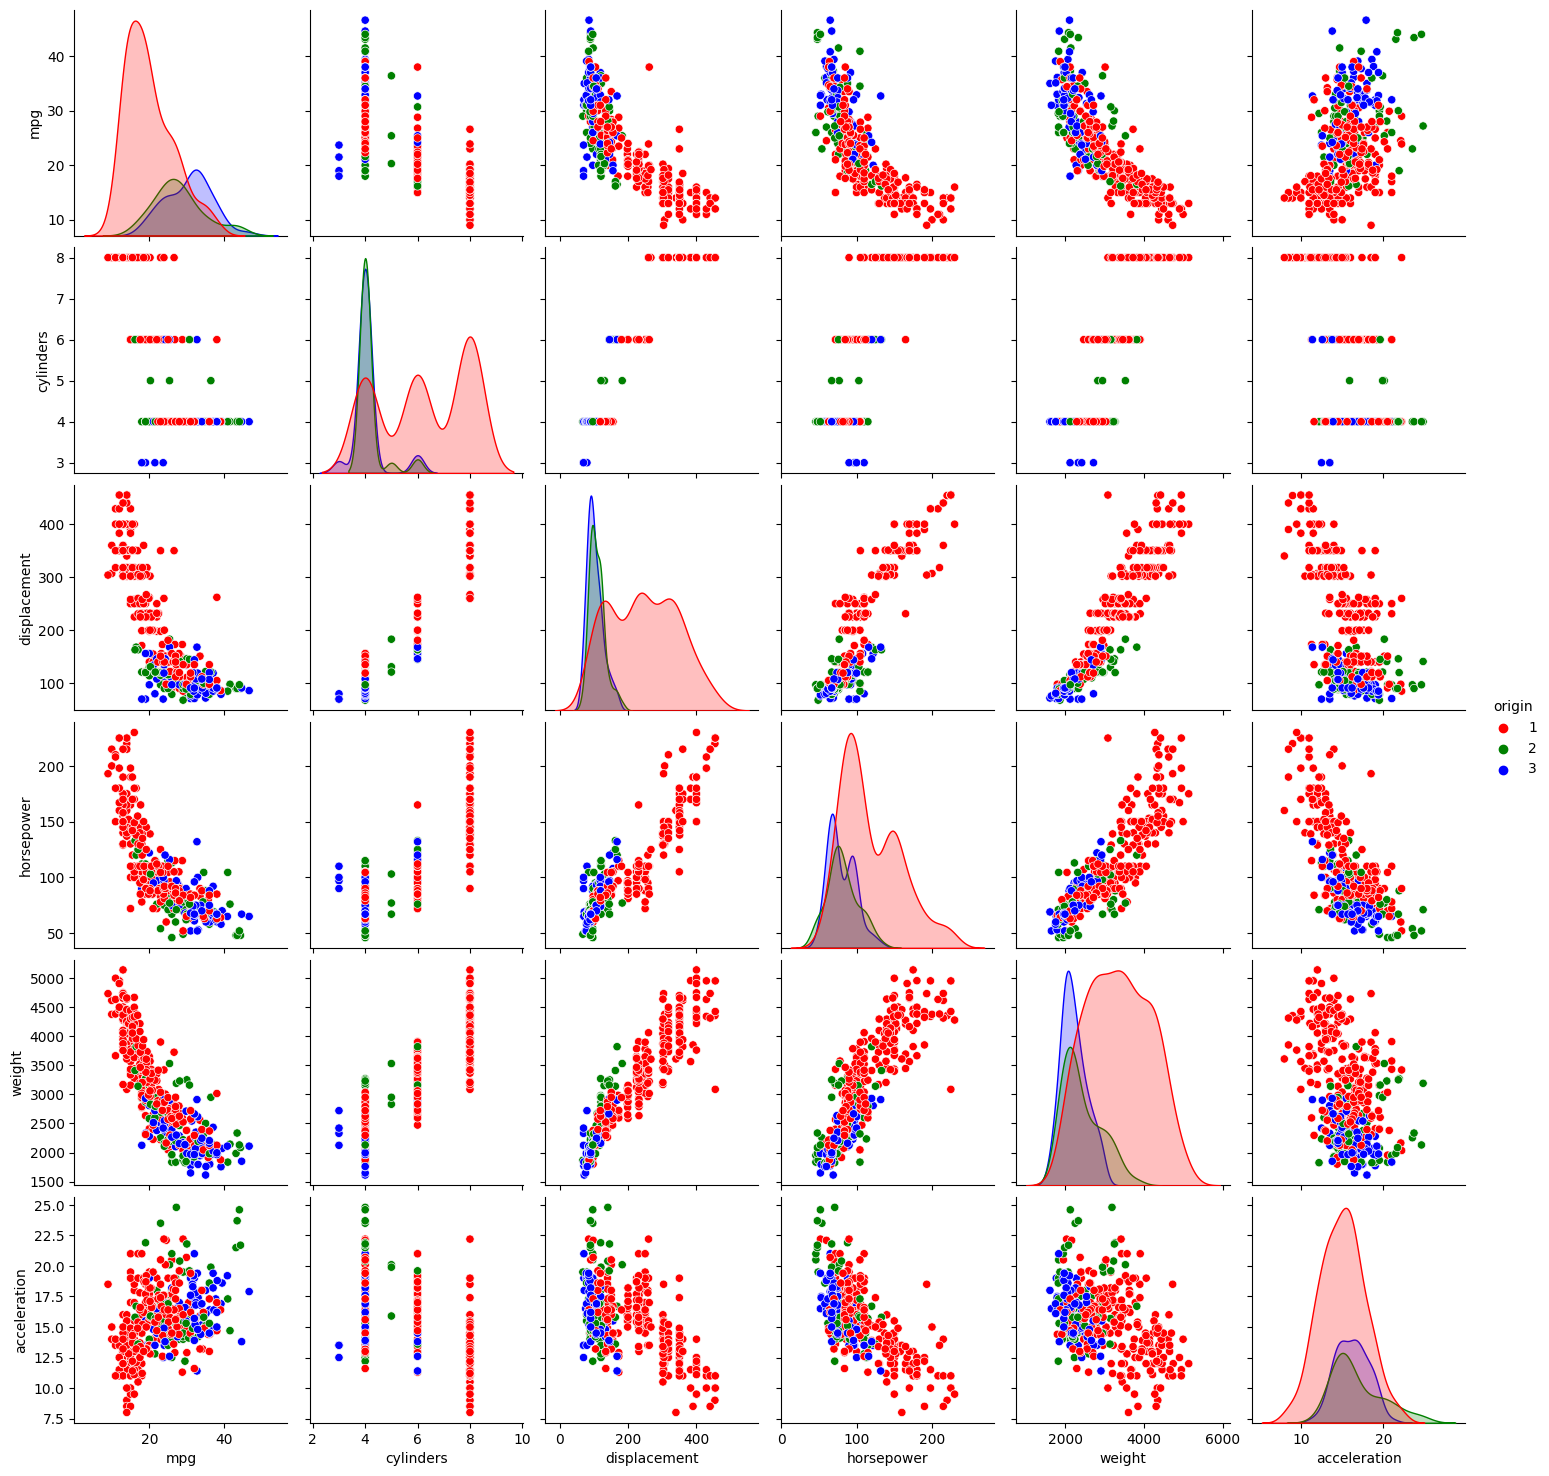

In [66]:
import seaborn as sns
sns.pairplot(subset, hue="origin", palette = ['r', 'g', 'b'])
plt.show()

In [67]:
subset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130.0,3504,12.0,1
1,15.0,8,350.0,165.0,3693,11.5,1
2,18.0,8,318.0,150.0,3436,11.0,1
3,16.0,8,304.0,150.0,3433,12.0,1
4,17.0,8,302.0,140.0,3449,10.5,1


In [68]:
X = subset.drop('mpg', axis=1)
y = subset['mpg']

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividimos los datos en train/test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=42)

# Iniciamos el regresor
# Prueben ajustar la profundidad - argumento max_depth
dt = DecisionTreeRegressor(max_depth=100, random_state=42, min_samples_leaf=0.1)

# Entrenamos con la base de entrenamiento
dt.fit(X_train, y_train)

# Hacemos predicciones
predictions = dt.predict(X_test)

# Calculamos métricas
r2 = dt.score(X_test, y_test) 
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Imrpimimos los resultados
print(f"R2: {round(r2,2)}")
print(f"MSE: {round(mse,2)}")
print(f"RMSE: {round(rmse,2)}")
print(f"MAE: {round(mae,2)}")

R2: 0.71
MSE: 15.35
RMSE: 3.92
MAE: 2.97


* **Otra ventaja de los arboles de decisión es que podemos graficar las divisiones / ramas del arbol**

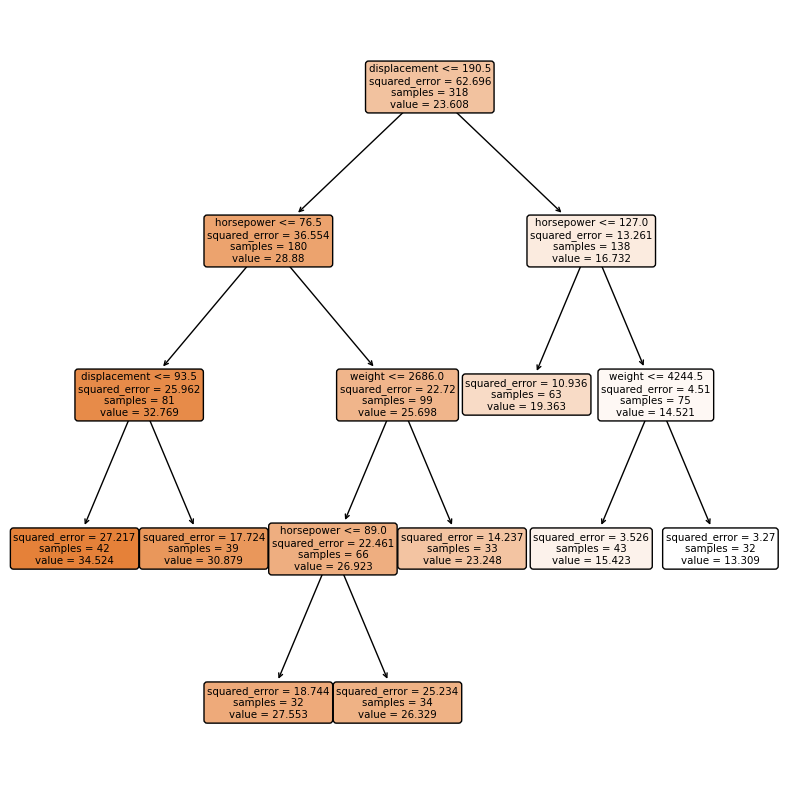

In [84]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualiza el árbol
plt.figure(figsize=(10, 10))

# Se puede setear impurity True para ver el error de cada división
plot_tree(dt, filled=True, feature_names=X.columns, rounded=True, impurity = True)

plt.show()

---
### Ventajas de árbol de decisión:

- Sencillos de entender e interpretar
- Fáciles de entrenar
- Flexibles a datos no lineales
- No hay necesidad de estandarizar o normalizar las variables

### Desventajas de un árbol de decisión: 
- Clasificación: solo produce decision boundaries binarios 
- Sensible a pequeñas variaciones en el training set
- Alta varianza: si no restringimos su profundidad o utilizamos técnicas de regularización hay altas chances de que tengamos sobreajuste. `Prueben ajustar la profundidad en el ejemplo de más arriba.`

---

# **3) Modelos de ensemble / ensamble**

`¿Que es un ensemble (en inglés)?`
<div style="">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/2426940619.png" style="width:550px;">
</div>

#### `¿Qué es un Ensamble?`
Es una colección de modelos de aprendizaje automático que trabajan juntos para realizar una predicción. La idea básica es `combinar múltiples modelos "débiles"` para crear un modelo "fuerte" que tenga un mejor rendimiento que cualquiera de los modelos individuales.

#### ¿Por qué Usar Ensambles?
- Mejorar el Rendimiento: 
Al combinar múltiples modelos, los métodos de ensamble a menudo logran un rendimiento superior en comparación con modelos individuales.

- Reducir el Sobreajuste: 
Los ensambles pueden suavizar las decisiones tomadas por modelos individuales, lo que puede ayudar a reducir el sobreajuste, especialmente en modelos con alta varianza como los árboles de decisión no restringidos.

- Aumentar la Robustez: 
Un ensamble es menos sensible a los errores de un solo modelo, lo que lo hace más robusto ante variaciones en los datos de entrada. Los métodos de ensamble, y sobre todo algunos que vamos a ver, son el `state of the art` en cualquier competencia de machine learning. 

#### Tipos Comunes de Ensambles
* **`Bagging (Bootstrap Aggregating)`**: 

Este método implica entrenar múltiples instancias del mismo modelo en diferentes subconjuntos del conjunto de datos de entrenamiento. Ejemplo: Random Forest.

<div style="">
    <a href='https://medium.com/@hemaanushatangellamudi/bootstrapped-aggregation-bagging-481f4812e3ea'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/7956759562.png" style="width:750px;"></a>
</div>


* **`Boosting`**: 

A diferencia del bagging, el boosting se enfoca en entrenar modelos de manera secuencial, donde cada modelo corrige los errores del modelo anterior. Ejemplo: AdaBoost, XGBoost.

<div style="">
    <a href='https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9695780471.png" style="width:750px;"></a>
</div>


* **`Stacking`**: 

Este método combina diferentes tipos de modelos. Se entrenan varios modelos utilizando el mismo conjunto de datos y luego se utiliza un modelo adicional (llamado meta-modelo) para hacer una predicción final basada en las predicciones de los modelos individuales.

<div style="">
    <a href='https://medium.com/@brijesh_soni/stacking-to-improve-model-performance-a-comprehensive-guide-on-ensemble-learning-in-python-9ed53c93ce28'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/3886992141.png" style="width:750px;"></a>
</div>


* **`Voting Classifier`**: 

Este método combina varios modelos de clasificación y toma una decisión final basada en el "voto" de cada modelo. Puede ser un voto duro o blando.

<div style="">
    <a href='https://vitalflux.com/hard-vs-soft-voting-classifier-python-example/'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1517463921.png" style="width:450px;"></a>
</div>

Un meme dice más que mil palabras..

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/6656698580.png" style="width:550px;">
</div>

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/3281747344.png" style="width:550px;">
</div>

---
## Bagging: 

Es un método de ensemble que tiene como objetivo mejorar la estabilidad y precisión de algoritmos de machine learning.

Emplea un método de remuestreo conocido como bootstrap para crear `múltiples subconjuntos de datos`.

`Las predicciones de los múltiples modelos se combinan para crear una predicción final`, generalmente mediante votación mayoritaria para clasificación o promedio para regresión.

<div style="">
    <a href='https://medium.com/@hemaanushatangellamudi/bootstrapped-aggregation-bagging-481f4812e3ea'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/7956759562.png" style="width:750px;"></a>
</div>

*Ventajas:*
- Reduce la varianza y el sobreajuste.
- Permiten paralelismo.

*Desventajas:*
- Modelo sesgado o con datos ruidosos pueden tener mala performance. 

*Algoritmos más Comunes:*
* `Random Forest:` Esencialmente un bagging de árboles de decisión, con algunas diferencias clave como la selección aleatoria de características.
* `Bagged Trees:` Árboles de decisión clásicos entrenados con bagging.
* `Pasting:` Una variante que utiliza remuestreo sin reemplazo.

## `Random Forest`

<div style="">
    <img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/5980910538.png" style="width:550px;">
</div>

#### "Dos cabezas piensan mejor que una"

Es un algoritmo de ML que construye múltiples árboles de decisión durante el entrenamiento y realiza la predicción tomando la "votación" o el promedio de todas las predicciones de los árboles individuales.

Produce un modelo muy robusto y es capaz de obtener buenos resultados en una variedad de tipos de datos.

* **Manejo de Overfitting:** Aunque los árboles de decisión individuales son propensos al sobreajuste, al combinar múltiples árboles, Random Forest mitiga este problema.

* **Versatilidad**: Puede manejar tanto datos categóricos como numéricos y también puede manejar valores perdidos.

* **Facilidad de Uso:** Ofrece una buena precisión incluso sin ajuste de hiperparámetros, lo que lo hace fácil de usar para los principiantes.

* **Interpretación de Características:** Random Forest ofrece una medida de la "importancia" de las características, lo cual es útil para la selección de características y la interpretación del modelo.

### ¿Cómo funciona?

1) **Bootstrap Sampling**: Selecciona aleatoriamente subconjuntos de datos (`filas!`) para entrenar cada árbol.

2) **División Aleatoria:** En cada nodo del árbol, selecciona un subconjunto aleatorio de características (`columnas!`) para realizar la división.

3) **Votación o Promedio:** Para hacer una predicción, el algoritmo considera la predicción de cada árbol y realiza una votación (clasificación) o un promedio (regresión) para emitir la predicción final del conjunto.

### Manos a la obra

In [90]:
subset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130.0,3504,12.0,1
1,15.0,8,350.0,165.0,3693,11.5,1
2,18.0,8,318.0,150.0,3436,11.0,1
3,16.0,8,304.0,150.0,3433,12.0,1
4,17.0,8,302.0,140.0,3449,10.5,1


In [91]:
X = subset[['displacement','weight','horsepower','cylinders']]
y = subset['mpg']

In [93]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividimos nuestro dataset nuevamente
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# Generamos nuestra instancia
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=42)

# Entrenamos
rf.fit(X_train, y_train)

# Hacemos las predicciones
predictions = rf.predict(X_test)

# Calculamos métricas
r2 = rf.score(X_test, y_test) 
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Imrpimimos los resultados
print(f"R2: {round(r2,2)}")
print(f"MSE: {round(mse,2)}")
print(f"RMSE: {round(rmse,2)}")
print(f"MAE: {round(mae,2)}")

R2: 0.76
MSE: 13.59
RMSE: 3.69
MAE: 2.84


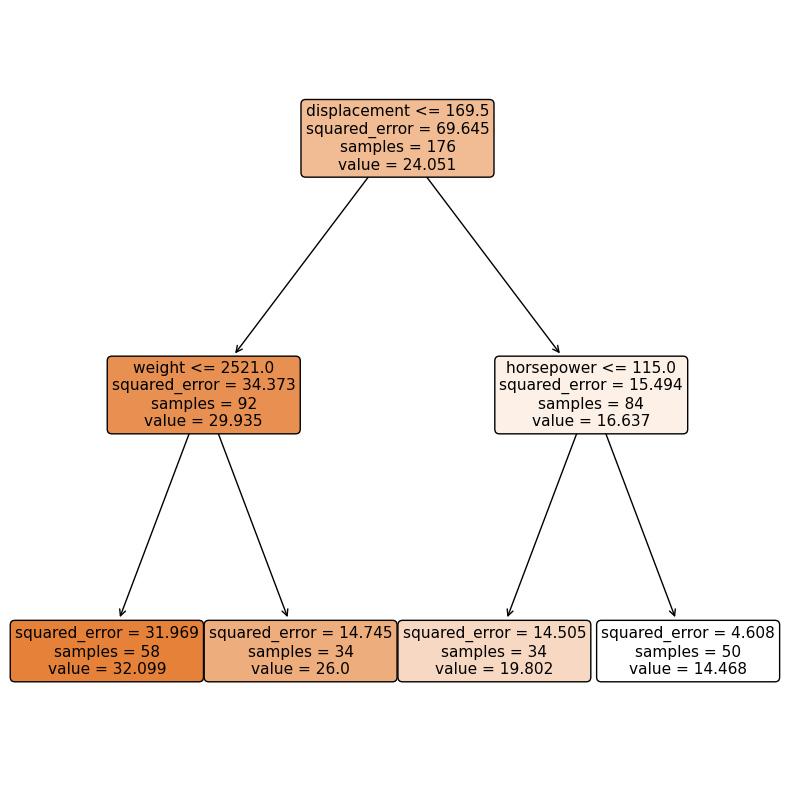

In [87]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Seleccionamos 1 arbol de los 400 entrenados
estimator = rf.estimators_[300]

# Visualiza el árbol
plt.figure(figsize=(10, 10))

# Se puede setear impurity True para ver el error de cada división
plot_tree(estimator, filled=True, feature_names=X.columns, rounded=True, impurity = True)

plt.show()

### **`Feature importance`**

Uno de los beneficios de usar modelos de bagging como Random Forest es su **utilidad para medir la importancia de nuestros features** (columnas que van a predecir nuestro targe/label).

Es una puntuación que indica cuán útiles o valiosas son las características individuales para la predicción.

Nos permite entender qué variables son más importantes para nuestro modelo y poder hacer modelos más simples, respetando el *principio de parsimonia*.

**¿Cómo se mide?**

`Se calcula observando qué tanto reduce el error cada característica` cuando se utiliza en cada uno de los árboles del bosque. Esto se promedia y luego se muestran los resultados globales (para todos los árboles del bosque)

In [88]:
# Imprimimos cada dato, esto se guarda dentro del objeto instanciado por la clase, cuando entrenamos el modelo

for i, item in enumerate(rf.feature_importances_):
    # Hacemos un print básico
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

cylinders: 0.08
displacement: 0.60
horsepower: 0.14
weight: 0.17
acceleration: 0.00
origin: 0.00


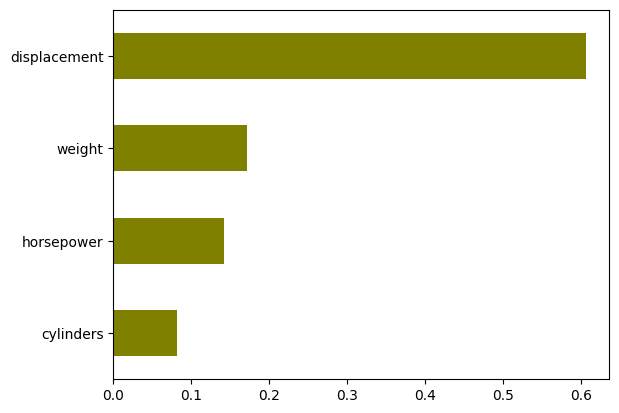

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Sacamos el feature importance, esta en el atributo feature_importances_
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Las acomodamos por orden descendente
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='olive')
plt.show()

---
## Boosting

<div style="">
    <a href='https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9695780471.png" style="width:750px;"></a>
</div>

Es otro método de ensamble que tiene como objetivo mejorar el rendimiento de un modelo base, pero a diferencia del bagging, `lo hace de manera secuencial.`

El objetivo principal del boosting es reducir el sesgo y la varianza. Se enfoca especialmente en manejar el sesgo al mejorar la precisión de un modelo débil.

¿Cómo funciona?
Los modelos se entrenan en secuencia, y `cada uno trata de corregir los errores del conjunto de modelos anteriores`.

<div style="text-align:center;">
    <a href='https://mathchi.medium.com/weak-learners-strong-learners-for-machine-learning-e73e32f86ebd'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9681740774.png" style="width:350px;"></a>
</div>


Se combinan varios weak learners para formar un strong learner. Un weak learner es un modelo que realiza predicciones ligeramente mejores que las adivinaciones al azar. Y a medida que vamos iterando, estas predicciones van mejorando y disminuye el error.

* `Ventajas`: Alta precisión, capacidad para manejar datos desequilibrados, y generalmente no requiere ajuste de parámetros complejos.

* `Desventajas`: Mayor riesgo de sobreajuste comparado con Bagging, y generalmente más lento de entrenar debido a que los modelos se entrenan de manera secuencial.

Modelos de Boosting más conocidos:
- **AdaBoost (Adaptive Boosting):** Uno de los primeros y más simples algoritmos de boosting. Pone más peso en las instancias que son difíciles de clasificar.

- **Gradient Boosting:** Utiliza el descenso de gradiente para minimizar los errores. Es muy versátil y potente, pero puede ser más difícil de ajustar.

- **XGBoost:** Una optimización del algoritmo de Gradient Boosting que está diseñada para ser más eficiente y ofrece varios beneficios adicionales como regularización.

- **LightGBM:** Una implementación más ligera y más rápida del Gradient Boosting, que es eficaz en conjuntos de datos grandes.

- **CatBoost:** Optimizado para manejar características categóricas directamente.

### STACKING = ENTRENAMIENTO EN PARALELO
### BOOSTING = ENTRENAMIENTO EN SERIE

### **`AdaBoost`**

AdaBoost se centra en mejorar las predicciones de su predecesor, ajustando constantemente los pesos de las instancias de entrenamiento que se predijeron incorrectamente.

Coeficiente Alfa: Cada predictor tiene un coeficiente alfa que mide su contribución en la predicción final del ensamble. Este coeficiente se calcula con base en el error de entrenamiento del predictor.


<div style="text-align:center;">
    <a href=''><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/8731161876.png" style="width:750px;"></a>
</div>

**Entrenamiento:** 

AdaBoost entrena una serie de predictores de forma secuencial. Los errores de cada predictor se utilizan para ajustar los pesos de las instancias de entrenamiento para el siguiente predictor. `Las instancias mal clasificadas reciben más peso, forzando al siguiente predictor a enfocarse en ellas`.

<div style="text-align:center;">
    <a href='https://www.analyticsvidhya.com/blog/2022/01/introduction-to-adaboost-for-absolute-beginners/'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/3600529445.png" style="width:750px;"></a>
</div>

`Tasa de Aprendizaje (Eta)`: Es un parámetro entre 0 y 1 que se utiliza para ajustar el coeficiente alfa. Un valor más pequeño de eta generalmente requiere un mayor número de estimadores en el ensamble.

`Predicción`: Una vez entrenados todos los predictores, la predicción se realiza mediante una votación ponderada para problemas de clasificación o una media ponderada para problemas de regresión.


In [96]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividimos nuestro dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iniciamos nuestro modelo - instanciando la clase
ada = AdaBoostRegressor(n_estimators=50, random_state=42)

# Entrenamos
ada.fit(X_train, y_train)

# Predecimos con el test set
predictions = ada.predict(X_test)

# Calculamos métricas
r2 = ada.score(X_test, y_test) 
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Imrpimimos los resultados
print(f"R2: {round(r2,2)}")
print(f"MSE: {round(mse,2)}")
print(f"RMSE: {round(rmse,2)}")
print(f"MAE: {round(mae,2)}")

R2: 0.75
MSE: 14.42
RMSE: 3.8
MAE: 2.97


### **`Gradient Boosting`**

Es un algoritmo de boosting muy popular con un historial comprobado de ganar múltiples competencias de aprendizaje automático.

A diferencia de AdaBoost, en Gradient Boosting no se ajustan los pesos de las instancias de entrenamiento. En cambio, cada predictor se entrena utilizando los errores residuales de su predecesor como etiquetas. En este caso, el aprendiz base es un Árbol de Decisión.

`Entrenamiento en Problemas de Regresión`: 
1) El conjunto consta de $N$ árboles. El primer árbol se entrena con la matriz de características $X$ y las etiquetas del conjunto de datos $y$. 
2) Las predicciones, denotadas como $\hat{y}_1$, se usan para determinar los errores residuales $r_1$. 
3) **El siguiente árbol se entrena usando $X$ y $r_1$ como etiquetas.** 
4) Este proceso se repite hasta que todos los árboles estén entrenados.

<div style="text-align:center;">
    <a href='https://www.analyticsvidhya.com/blog/2022/01/introduction-to-adaboost-for-absolute-beginners/'><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/5168863376.png" style="width:750px;"></a>
</div>

`Decrecimiento (Shrinkage):` Un parámetro importante en Gradient Boosting es la tasa de aprendizaje, $\eta$, que está entre 0 y 1. Al igual que en AdaBoost, existe un compromiso entre $\eta$ y el número de estimadores. Disminuir la tasa de aprendizaje debe compensarse con un aumento en el número de estimadores para alcanzar un rendimiento determinado.

`Predicción:` Una vez entrenados todos los árboles, se puede realizar una predicción. Cada árbol predice una etiqueta y la predicción final del conjunto se obtiene mediante una suma ponderada de estas predicciones.

In [ ]:
X = df2.drop(['mpg', 'car name'], axis=1)
y = df2['mpg']

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hacemos la división de siempre
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Iniciamos nuestro regresor
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)

# Entrenamos
gbt.fit(X_train, y_train)

# Predecimos
predictions = gbt.predict(X_test)

# Calculamos métricas
r2 = gbt.score(X_test, y_test) 
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Imprimimos los resultados
print(f"R2: {round(r2,2)}")
print(f"MSE: {round(mse,2)}")
print(f"RMSE: {round(rmse,2)}")
print(f"MAE: {round(mae,2)}")

R2: 0.77
MSE: 13.12
RMSE: 3.62
MAE: 2.72


### **`XGBoost`**

<div style="text-align:center;">
    <a href=''><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/5960551737.png" style="width:450px;"></a>
</div>

XGBoost significa `eXtreme Gradient Boosting`. Es una implementación optimizada del algoritmo Gradient Boosting que busca ser extremadamente rápida y eficiente. Este algoritmo se ha vuelto increíblemente popular en el mundo del aprendizaje automático por su velocidad y rendimiento. Es el ganador de la mayoría de competeciones de Machine Learning. 

¿Por qué deberíamos prestarle atención?
* Velocidad y Eficiencia: XGBoost `ha sido diseñado para ser increíblemente rápido` comparado con otras implementaciones de Gradient Boosting.

* Alto Rendimiento: Consistentemente `supera otros modelos en tareas de clasificación y regresión`.

* Versatilidad y Personalización: Soporta ajuste de hiperparámetros, regularización y puede adaptarse para resolver diversos tipos de problemas, incluidos problemas de ranking.

* Robustez: Puede manejar datos desequilibrados y valores faltantes con elegancia.

* Interpretabilidad: Al igual que otros árboles de decisión, ofrece buena interpretabilidad con la importancia de las características.

### ¿Cómo funciona?
Toma el concepto de Gradient Boosting y lo optimiza. Utiliza un procedimiento más regularizado para encontrar el árbol de decisión óptimo, lo cual mejora el rendimiento y controla el sobreajuste.

- Optimización de Recursos: Utiliza algoritmos de particionado de árboles eficientes y técnicas de paralelización para acelerar el proceso de entrenamiento del modelo.

- Técnicas Avanzadas de Regularización: Implementa diversas técnicas de regularización, manejo de datos faltantes y optimización para obtener el mejor modelo posible.

- Flexibilidad: Permite a los usuarios definir objetivos de optimización personalizados y criterios de evaluación, haciendo que se pueda adaptar a casi cualquier problema.

### ¿Cuándo usarlo?
- Más de 1000 muestras (filas), y menos de 100 features (columnas)
- Mayor cantidad de filas que de columnas
- Mix de variables categóricas y numéricas, o solo numéricas.

In [98]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iniciamos el regresor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, seed=42)

# Entrenamos
xg_reg.fit(X_train, y_train)

# Predecimos
predictions = xg_reg.predict(X_test)

# Calculamos métricas
r2 = gbt.score(X_test, y_test) 
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

# Imprimimos los resultados
print(f"R2: {round(r2,2)}")
print(f"MSE: {round(mse,2)}")
print(f"RMSE: {round(rmse,2)}")
print(f"MAE: {round(mae,2)}")

R2: 0.77
MSE: 16.58
RMSE: 4.07
MAE: 2.96


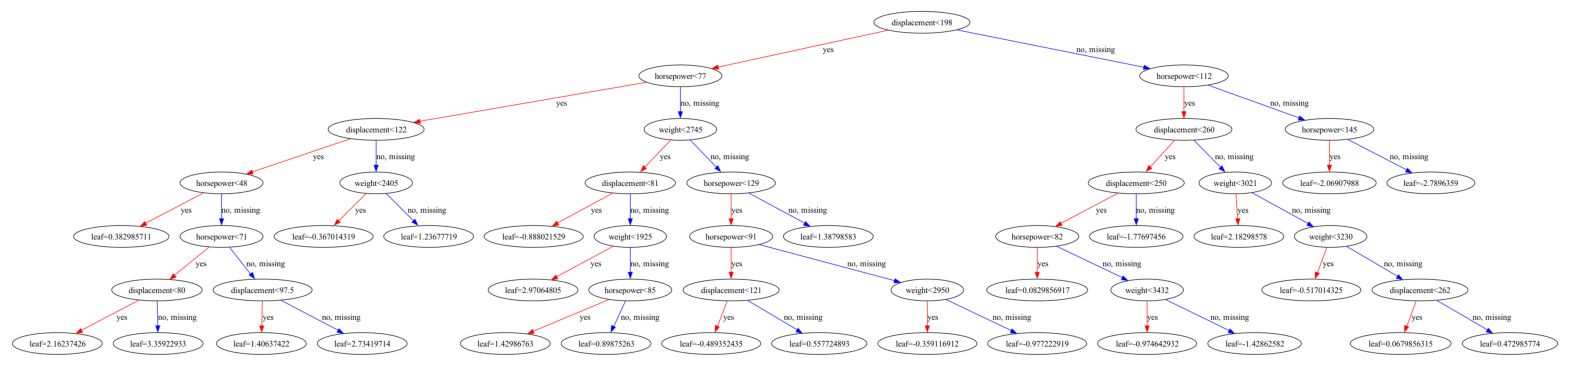

In [99]:
from xgboost import plot_tree

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Imprimimos el primer arbol de decisión
plot_tree(xg_reg, num_trees=0, ax= ax)

plt.show()

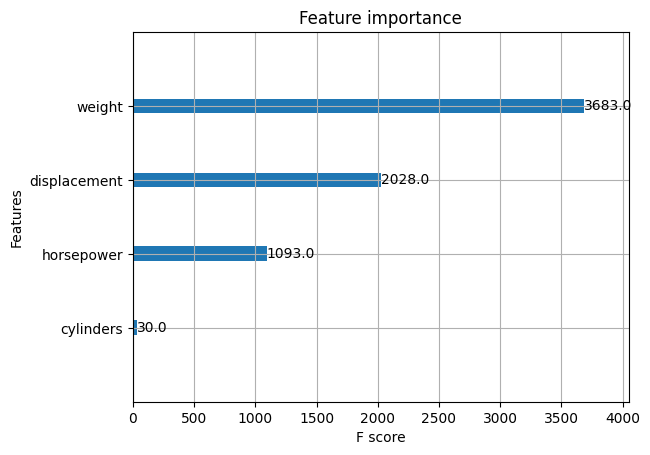

In [100]:
from xgboost import plot_importance
plot_importance(xg_reg)
plt.show()

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/7502823478.png)

## `Integración`


Habitualmente, para un data scientist, la parte más "tediosa" del trabajo del día a día es la preparación, limpieza, y exploración de los datos previo al entrenamiento de modelos. 
Entender su distribución, anomalías, distribución de datos perdidos, es clave para poder corregir "río arriba" problemas potenciales previo al entrenamiento. 

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/6723196764.png)

En general una vez que logramos ese cometido, entrenar y probar múltiples modelos es más sencillo ya que podemos crear nuestros scripts para hacerlo. 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

def run_exps_regression(X_train, y_train, X_test, y_test):
    '''
    Esta funcion recibe los 4 argumentos de train_test_split
    Devuelve un DataFrame de Pandas con métricas para cada ciclo de validación
    '''

    # Normalizamos todos los datos
    # Solo va a ser util para los modelos lineales
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Vamos a guardar todos los dataframes y luego juntarlos al final del loop
    dfs = []

    # Seleccionamos que modelos queremos correr
    # Fijense que no seteamos hiperparámetros, es una corrida "de prueba"
    models = [
        ('LinReg', LinearRegression()), 
        ('Ridge', Ridge()),
        ('Lasso', Lasso()),
        ('RF', RandomForestRegressor()),
        ('GBM', GradientBoostingRegressor()),
        ('ADA', AdaBoostRegressor(n_estimators=50, random_state=42)),
        ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, seed=42))
    ]

    # Seleccionamos que metricas queremos que calcule el cross_validation
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

    # Corremos el loop
    for name, model in models:
        # Iniciamos el KFold para cross validation
        # Va a dividir el dataset en 5 splits y correr cada modelo en los 5 splits
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        
        # Guardamos los resultados de las metricas que le pedimos que calcule
        # Las calcula para cada subset
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

        # Entrenamos
        clf = model.fit(X_train, y_train)

        # Testeamos / hacemos predicciones
        y_pred = clf.predict(X_test)

        # Agregamos los resultados a un dataframe
        this_df = pd.DataFrame(cv_results)

        # Renombramos las columnas
        this_df.rename(columns={'test_r2': 'r2',
                                'test_neg_root_mean_squared_error': 'mean_root_squared_error',
                                'test_neg_mean_absolute_error':'mean_absolute_error'
                                }, inplace= True)

        # Ponemos todo en positivo
        this_df['mean_root_squared_error'] = this_df['mean_root_squared_error'].mul(-1)
        this_df['mean_absolute_error'] = this_df['mean_absolute_error'].mul(-1)
        this_df['model'] = name

        # Agregamos el dataframe a nuestra lista
        dfs.append(this_df)

    # Una vez finalizado el loop, juntamos todos esos dataframes pequeños en uno solo
    final = pd.concat(dfs, ignore_index=True)
    
    # No necesitamos todas las columnas, dropaeamos algunas
    columns_to_drop = ['fit_time', 'score_time']

    # Retornamos el dataframe de interes
    return final.drop(columns_to_drop, axis=1)


def generate_machine_learning(df:pd.DataFrame, features:list, target:str, graphic: bool): 
    '''
    Esta funcion transforma un dataframe de pandas en graficos de metricas de cross-validation

    Argumentos:
    ----------
    df: DataFrame - el dataframe con las metricas
    features: list - nombres de las columnas
    target: string - el nombre de la columna target
    graphic: boolean - el 

    Retorna:
    ---------
    Fig: grafico de plotly renderizado
    '''

    # Dividimos nuestro dataset para entrenaimento y testeo
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target].values.reshape(-1,1), test_size=0.2,random_state=42)
    
    # Corremos los experimentos y recibimos el dataframe de Pandas con las metricas
    final = run_exps_regression(X_train, y_train, X_test, y_test)

    # Hago un remuestreo, con 30 muestras, para poder estimar distribución, varianza, intervalos de confianza, etc. 
    bootstraps = []
    for model in list(set(final.model.values)):
        model_df = final.loc[final.model == model]
        bootstrap = model_df.sample(n=30, replace=True)
        bootstraps.append(bootstrap)
            
    bootstrap_df = pd.concat(bootstraps, ignore_index=True)
    
    # Hacemos una denormalizacion del dataset, es mas facil para hacer el grafico
    # En vez de una columna por metrica, todas las metricas quedan en 'values', y el nombre de la metrica en 'metrics'
    results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')

    ## PERFORMANCE METRICS
    # Las acomodamos por valores...medio al edp
    results_long['metrics'] = results_long['metrics'].replace({'r2': 'R-cuadrado', 
                                                                        'mean_absolute_error': 'Error absoluto medio', 
                                                                        'mean_root_squared_error': 'Raíz del error cuadrático medio'})
    
    # Creamos nuestro grafico en Plotly
    # Le decimos quien es X y quien es Y, y por que columnas separalo - en este caso metricas
    fig = px.box(results_long, 
                x='model', 
                y='values', 
                color='metrics',
            # Le especificamos una paleta de colores
            color_discrete_sequence=px.colors.qualitative.G10,

            # Le pedimos que muestre 'values' como Métrica
            labels={'values': 'Métrica'},

            # Si activamos esto, al pasar el mouse, nos muestra mas informacion estadistica
            hover_data={'metrics': True, 'model': True})

    # Aclaramos el titulo y algunas cositas más de formato
    fig.update_layout(title='Comparación de modelos de regresión',
                    title_x = 0.5,
                    title_font = dict(size=25),
                    # Le pedimos que muestre las metricas abajo
                    legend=dict(title='Métricas', orientation = 'h', font = dict(size = 15), x=0.5, xanchor='center'),
                    font=dict(size=18),
                    xaxis=dict(title=''))
    # Si el argumento graphic es True, mostrar el grafico
    if graphic:
        # Retornamos el grafico ya procesado como un objeto
        return fig
    # Sino mostrar el dataframe
    else:
        # Retornamos 
        return final

In [102]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [103]:
generate_machine_learning(df2, ['cylinders', 'displacement', 'horsepower', 'weight','acceleration'], 'mpg', graphic = True)

<div style="text-align:center;">
    <a href=''><img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/5106800531.png" style="width:750px;"></a>
</div>